In [314]:
import pandas as pd
import numpy as np1
from __future__ import division
import scipy.io as scio
from scipy import sparse
from scipy.sparse.linalg.eigen import arpack
from numpy import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline
iris = load_iris()
from numpy import *
import numpy as np
from sklearn.cluster import SpectralClustering
 
#定义高斯相似度
def gaussian_simfunc(v1,v2,sigma=1):
	tee=(np.linalg.norm(v1-v2)**2)/(2*(sigma**2))
	return exp(tee)

#构建相似度矩阵W
def construct_W (vec):
    n = len (vec)
    W = zeros ((n, n))
    for i in range(n):
        if(i % 1000==0):
            print("c--"+str(i))
        for j in range(i,n):
            W[i,j] = W[j,i] = gaussian_simfunc (vec[i], vec[j])   #
   
    return W



def calLaplacianMatrix(adjacentMatrix):#构建喇布拉斯矩阵

    
    degreeMatrix = np.sum(adjacentMatrix, axis=1)#度矩阵

    #  Matrix: L=D-A
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix

    # 标准化度矩阵
  
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)
from sklearn.cluster import KMeans

    


c--0


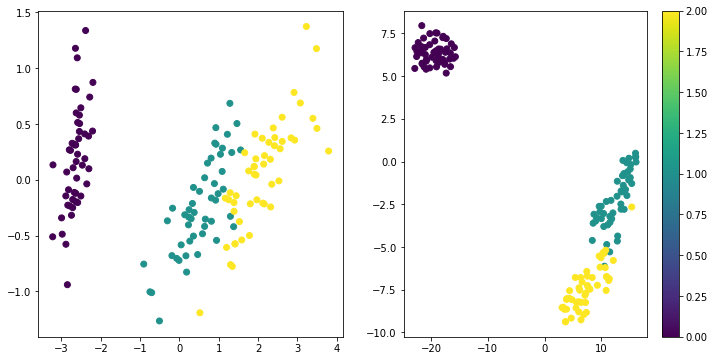

In [312]:
if __name__ == '__main__':
    S=construct_W (iris.data)#计算相似度矩阵并确定阈值
    S[S<0]=0
    S[S<18]=0

   


L=calLaplacianMatrix(S)#计算喇布拉斯的特征向量和值并且使用k聚类
lam, H = np.linalg.eig(L)
model = KMeans(n_clusters=3)
model.fit(H)
result=model.labels_


import matplotlib.pyplot as plt#使用pca 或tsne 降维画出聚类效果图
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
tsne = TSNE(n_components=2, learning_rate=100).fit_transform(iris.data)
pca = PCA().fit_transform(iris.data)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(pca[:, 0], pca[:, 1], c=iris.target)
plt.subplot(122)
plt.scatter(tsne[:, 0], tsne[:, 1], c=iris.target)
plt.colorbar()
plt.show()


d:\python\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


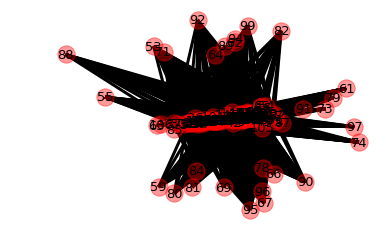

In [320]:
mat= S
mat[mat<0]=0
mat[mat<100]=0
g = nx.Graph()
for i in range(len(mat)):
    for j in range(len(mat)):
        if(mat[i,j]>100):  #删除边的权重小于等于0的边
         g.add_edge(i, j,weight=mat[i,j])

      # nx.draw(g)
      # nx.draw(g,with_labels=True)  # 将标号标出来
      # plt.show()

      # 按权重划分为重权值得边和轻权值的边
elarge = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] <= 0.5]
      # 节点位置
pos = nx.spring_layout(g)  # positions for all nodes
      # 首先画出节点位置
      # nodes
nx.draw_networkx_nodes(g, pos, node_color='r',node_size=300,alpha=0.4)
      # 根据权重，实线为权值大的边，虚线为权值小的边
      # edges
nx.draw_networkx_edges(g, pos, edgelist=elarge,
                             width=3)
nx.draw_networkx_edges(g, pos, edgelist=esmall,
                        width=1, alpha=0.5, edge_color='b', style='dashed')

      # labels标签定义
nx.draw_networkx_labels(g, pos, font_size=13, font_family='sans-serif')

plt.axis('off')
plt.show()

In [309]:
import numpy as np
import matplotlib.pyplot as plt
 
 
class Performance:#定义一个类
   
    def __init__(self, labels, scores, threshold=0.5):#初始化
    
        self.labels = labels
        self.scores = scores
        self.threshold = threshold
        self.db = self.get_db()
        self.TP, self.FP, self.FN, self.TN = self.get_confusion_matrix()
 
    def accuracy(self):#计算正确率
     
        return (self.TP + self.TN) / (self.TP + self.FN + self.FP + self.TN)
 
    def get_db(self):
        db = []
        for i in range(len(self.labels)):
            db.append([self.labels[i], self.scores[i]])
        db = sorted(db, key=lambda x: x[1], reverse=True)
        return db
 
    def get_confusion_matrix(self):#计算混淆矩阵
        tp, fp, fn, tn = 0., 0., 0., 0.
        for i in range(len(self.labels)):
            if self.labels[i] == 1 and self.scores[i] >= self.threshold:
                tp += 1
            elif self.labels[i] == 0 and self.scores[i] >= self.threshold:
                fp += 1
            elif self.labels[i] == 1 and self.scores[i] < self.threshold:
                fn += 1
            else:
                tn += 1
        return [tp, fp, fn, tn]

if __name__ == '__main__':
    labels = model.labels_
    scores = iris.target
    p = Performance(labels, scores)
    acc = p.accuracy()
    print('accuracy: %.2f' % acc)



accuracy: 0.82
